# Exercise 1: Daily returns of the magnificent seven

In this exercise, you are asked to analyze the weekly stockmarket returns
of the so-called magnificent 7 which are some of the most successful tech companies 
of the last decades years:
Apple (AAPL), Amazon (AMZN), Google (GOOG), Meta (META), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

1. Load the CSV data from 
    `../../data/stockmarket/magnificent7.csv`. 
    Inspect to first few rows
    to familiarize yourself with the columns present in the `DataFrame`.

    Keep only the columns `Date`, `Ticker`, `Open`, and `Close`.

2. You want to compute weekly returns for each of the 7 stocks. To this end, 
    you need to reshape the `DataFrame` so that `Date` is the index and the
    remaining dimensions are in (hierarchical) columns.

    One way to achieve this is to use the 
    [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    functions. Call this function with the arguments `index='Date'` and 
    `columns='Ticker'` and inspect the result.

    This should generate a hierarchical column index with `Open` and `Close`
    and the top level.

    Drop all rows with any missing values which arise because these
    stocks have been listed at different points in time.

3.  Your data is now in a format that can be resampled to weekly frequency.
    Use 
    [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
    to convert the data to weekly observations.

    Compute the weekly returns as the relative difference between the 
    *first* `Open` quote and the *last* `Close` quote for each ticker in each week.

    *Hint:* You should use `resample('W-MON')` so that the resampled weeks
    begin on Mondays (as opposed to the default Sundays).

    *Hint:* For example, to select the first `Open` value in each week, you should
    use `resample('W-MON')['Open'].first()`.

4.  Create a 3-by-3 figure and plot the weekly returns you computed for each ticker as a histogram,
    using 25 bins (i.e., `bins=25` should be passed to the `hist()` function).

    Since you have only 7 tickers but 9 subplots in the figure, the last 
    two remaining subplots should remain empty.

    *Hint:* You can either use [`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to plot the histogram, or Matplotlib's [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function. In either case, you should add `density=True` such that the histogram is appropriately rescaled and comparable to the normal density.
    
5.  **[Advanced]**
    Compare the histograms you created to the normal (Gaussian) probability 
    density function (PDF) to
    get an idea how much weekly returns differ from a normal distribution.

    First, compute mean and standard deviation for each ticker
    and tabulate these.

    Then add a line showing the normal PDF to each of the return histograms you created previously,
    using the mean and standard deviation for each ticker.

    *Hint:* Use the `pdf()` method of the [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) class to compute the normal density.

6.  Finally, you are interested in how the weekly returns are correlated across 
    the 7 stocks. 

    Create a figure with 7-by-7 subplots showing the pairwise correlations 
    for each combination of stocks.

    You can do this either with the
    [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) function contained in `pandas.plotting`, 
    or build the figure using Matplotlib functions.

    **[Advanced]**
    Additionally, use the 
    [DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
    method to compute the pairwise correlation matrix. Extract these values
    and add them as text to each of the 7-by-7 subplots
    (e.g., the correlation between returns on AAPL and AMZN is about 0.43,
    so this text should be added to the subplot showing the 
    scatter plot of AAPL vs. AMZN).


## Solution

### Part (1): Load data

In [1]:
# Path to data directory
DATA_PATH = '../../data/'

In [2]:
import pandas as pd

# Path to CSV file with stock market data
file = f'{DATA_PATH}/stockmarket/magnificent7.csv'

# Load data from CSV file
df = pd.read_csv(file, parse_dates=['Date'])

# Keep only selected columns
df = df[['Date', 'Ticker', 'Open', 'Close']]

# Display first 3 rows of the DataFrame
df.head(3)

,Date,Ticker,Open,Close
0,1980-12-12,AAPL,0.0987,0.0987
1,1980-12-15,AAPL,0.0940,0.0936
2,1980-12-16,AAPL,0.0871,0.0867


### Part (2): Pivot data

We first more the ticker dimension to the column axis so that the (unique) date can be used as row index:

In [3]:
# Pivot Ticker to columns, set Date as index
df = df.pivot(index='Date', columns='Ticker')

This generates rows with missing values because the panel of stock quotes is not balanced. We discard all dates which are missing observations for any of the stocks.

In [4]:
df = df.dropna()

The layout of the resulting `DataFrame` is now as follows:

In [5]:
df.head(3)

Open                                                      \
Ticker         AAPL     AMZN     GOOG     META     MSFT    NVDA    TSLA   
Date                                                                      
2012-05-18  16.0688  10.9705  15.5134  41.8900  23.8127  0.2907  1.8913   
2012-05-21  16.0850  10.7015  14.9031  36.3910  23.2611  0.2774  1.8387   
2012-05-22  17.1398  10.9155  15.2240  32.4859  23.7327  0.2815  2.0067   

              Close                                                      
Ticker         AAPL     AMZN     GOOG     META     MSFT    NVDA    TSLA  
Date                                                                     
2012-05-18  15.9610  10.6925  14.9004  38.0845  23.3970  0.2770  1.8373  
2012-05-21  16.8909  10.9055  15.2407  33.9005  23.7807  0.2818  1.9180  
2012-05-22  16.7612  10.7665  14.9103  30.8820  23.7887  0.2783  2.0533

### Part (3): Resample to weekly frequency

We create a `Resampler` object by calling 
[`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html).
This object is similar to the one returned by `groupby()`. In particular,
we can select individual columns and apply aggregation operations:

In [6]:
resampler = df.resample('W-MON')

For example, the following code selects the first `Open` observation in each week and prints the first 3 observations:

In [7]:
resampler['Open'].first().head(3)

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-21,16.0688,10.9705,15.5134,41.8900,23.8127,0.2907,1.8913
2012-05-28,17.1398,10.9155,15.2240,32.4859,23.7327,0.2815,2.0067
2012-06-04,17.1804,10.7150,14.7865,31.3602,23.4849,0.2889,2.0007


Similarly, the code below selects the last `Close` observation:

In [8]:
resampler['Close'].last().head(3)

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-21,16.8909,10.9055,15.2407,33.9005,23.7807,0.2818,1.9180
2012-05-28,16.9213,10.6445,14.6803,31.7886,23.2291,0.2843,1.9873
2012-06-04,16.9815,10.7285,14.3591,26.7976,22.8215,0.2689,1.8587


Note that the date index is the same for both DataFrames even though these observations clearly belong to different week days (usually Monday vs. Friday). The reason is that the Date index is determined by the resampling specification `'W-MON'`, *not* by the aggregating operation applied to the data.

We can now compute the weekly returns as the relative difference between the last `Close` quote and the first `Open` quote within any given week:

In [9]:
# Weekly returns in percent
returns = (resampler['Close'].last() - resampler['Open'].first()) / resampler['Open'].first() * 100

# Verify that results look as expected
returns.head(3)

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-21,5.116126,-0.592498,-1.757835,-19.072571,-0.134382,-3.061576,1.411727
2012-05-28,-1.274811,-2.482708,-3.571335,-2.146470,-2.121967,0.994671,-0.966761
2012-06-04,-1.157715,0.125992,-2.890474,-14.549014,-2.824794,-6.922811,-7.097516


### Part (4)

The histograms can be generated either using 
[`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)
or building the figure from scratch with Matplotlib functions. 

We demonstrate the first approach in this part and the second one below when we add the normal density to each plot.

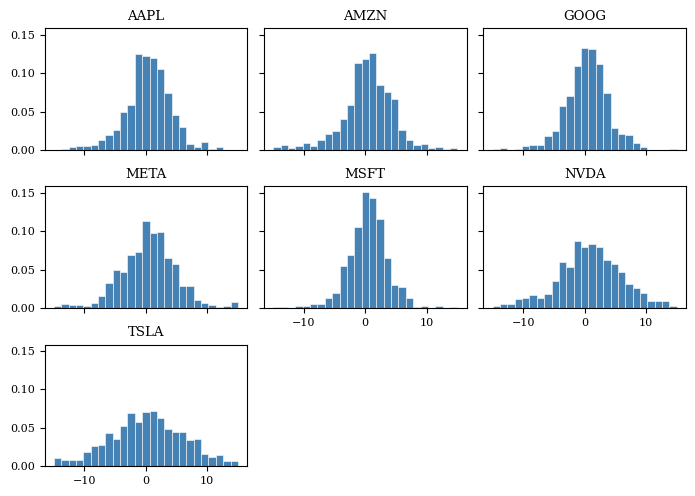

In [10]:
xmin, xmax = -15, 15

# Use DataFrame.hist() to create histograms
axes = returns.hist(
    bins=25,                # Number of bins in histogram
    figsize=(7, 5),         # Set size of the figure
    grid=False,             # Turn off grid
    layout=(3, 3),          # 3x3 grid of subplots
    sharex=True,            # Share x-axis range
    sharey=True,            # Share y-axis range
    density=True,           # Normalize histograms to densities
    range=(xmin, xmax),     # Set range for x-axis
    color='steelblue',      # Color for bars
    edgecolor='white',      # Color for bar edges
    lw=0.4,                 # Width of bar edges
)

# Use array of Axes to get figure and adjust layout
axes[0, 0].figure.tight_layout()

### Part (5): Add normal density

We first compute the mean and standard deviation of the returns for each ticker. We can do this with a single 
[`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) 
call, passing a list of functions to be applied to the data.

In [11]:
# Compute mean and standard deviation of returns
moments = returns.agg(['mean', 'std'])

# Display the moments
moments

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
mean,0.374410,0.415674,0.358118,0.443322,0.408083,0.923801,0.888141
std,3.746465,4.296775,3.545826,5.379422,3.203233,6.039996,8.205081


Once we have these statistics, we can add the normal PDF to each subplot. In this part, we use Matplotlib functions to create the figure from scratch, even though it is also possible
to use pandas's 
`DataFrame.hist()` and add the PDF lines later.

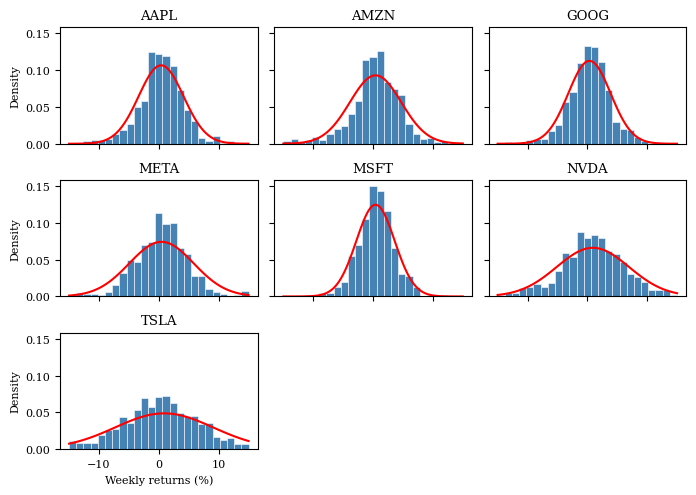

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Get list of tickers from DataFrame columns
tickers = returns.columns.to_list()

# Fix number of columns, compute implied rows
ncol = 3
nrow = int(np.ceil(len(tickers) / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(7, 5), sharex=True, sharey=True)

# x-values for plotting PDF
xvalues = np.linspace(xmin, xmax, 100)

for i in range(nrow):
    for j in range(ncol):
        # Select current axes
        ax = axes[i, j]

        # Map axes index to decade index
        k = i * ncol + j

        # Skip axes if there are no more tickers to plot
        if k >= len(tickers):
            ax.set_visible(False)
            continue

        # Ticker to plot in current axes
        ticker = tickers[k]

        # Retrieve moments for current ticker
        mean, std = moments[ticker]

        # Create histogram of returns
        ax.hist(
            returns[ticker],
            bins=25,
            density=True,
            lw=0.4,
            range=(xmin, xmax),
            color='steelblue',
            edgecolor='white',
        )

        # Superimpose PDF of normal distribution
        ax.plot(xvalues, norm.pdf(xvalues, mean, std), color='red', lw=1.5)

        # Add ticker name
        ax.set_title(ticker)

        # Add tick labels to the last row and first column
        if i == nrow - 1:
            ax.set_xlabel('Weekly returns (%)')
        if j == 0:
            ax.set_ylabel('Density')

fig.tight_layout()

### Part (6): Correlations

The simplest way to plot pairwise correlations is to use 
[`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) from the `pandas.plotting` module as this does all the work for us:

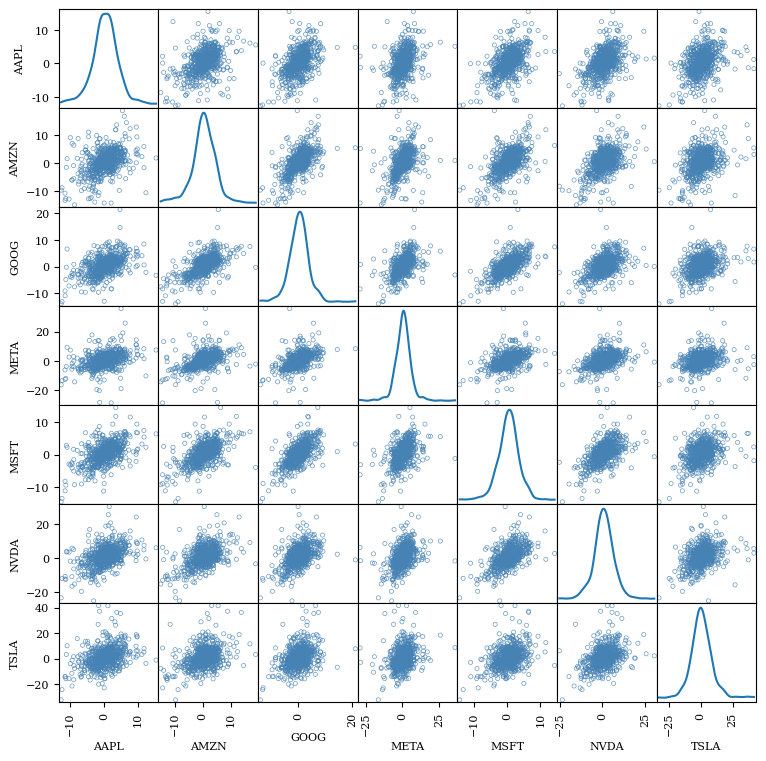

In [13]:
from pandas.plotting import scatter_matrix

# Create figure with 7x7 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(
    returns,
    figsize=(9, 9),
    alpha=0.8,                  # Set transparency of markers
    color='none',               # Color of markers (no filling)
    edgecolors='steelblue',     # Color of marker edges
    lw=0.5,                     # Width of marker edges
    diagonal='kde',             # Add kernel density estimate to diagonal
)

From these scatter plots you see that for all seven stocks, weekly returns are positively correlated, although the strength of this correlation differs. To quantify these correlations, we compute
the pairwise correlation matrix using
[DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html):

In [14]:
# Compute pairwise correlations
corr = returns.corr()

# Tabulate correlations
corr

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,1.000000,0.419038,0.493747,0.367183,0.531581,0.467872,0.362144
AMZN,0.419038,1.000000,0.605037,0.421036,0.569167,0.491111,0.378227
GOOG,0.493747,0.605037,1.000000,0.496771,0.643003,0.494999,0.368045
META,0.367183,0.421036,0.496771,1.000000,0.460664,0.402963,0.278660
MSFT,0.531581,0.569167,0.643003,0.460664,1.000000,0.568133,0.385710
NVDA,0.467872,0.491111,0.494999,0.402963,0.568133,1.000000,0.384198
TSLA,0.362144,0.378227,0.368045,0.278660,0.385710,0.384198,1.000000


The following code recreates the 7-by-7 figure from above and adds this pairwise correlation as text to each subplot:

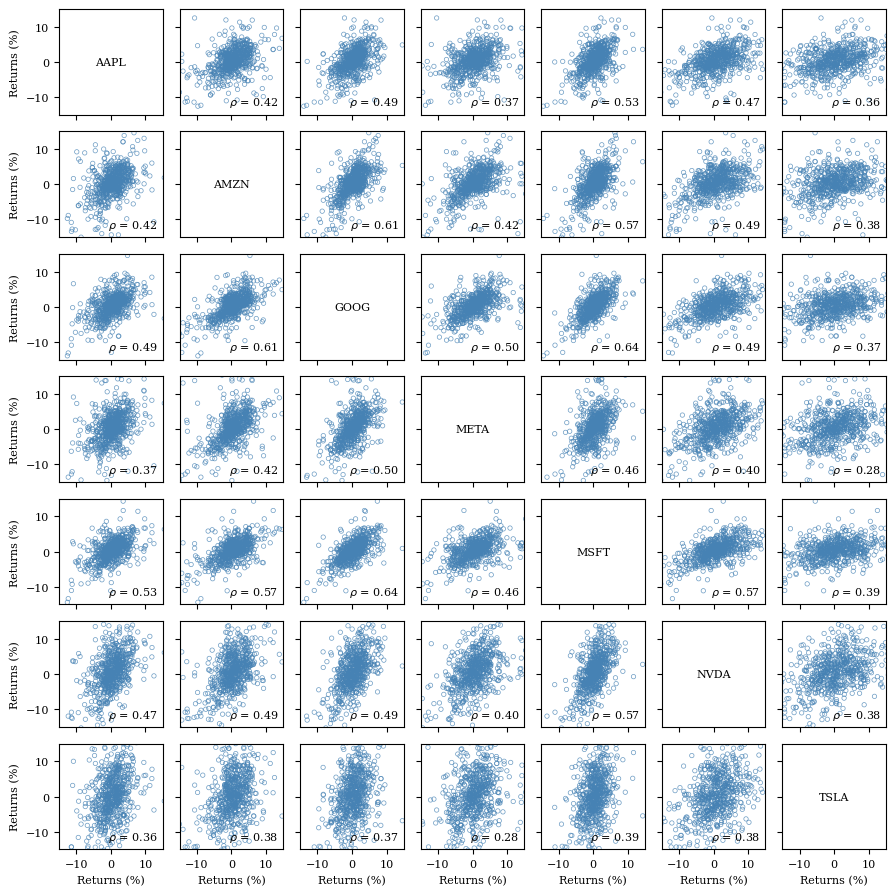

In [15]:
# List of tickers present in DataFrame
tickers = returns.columns.to_list()

n = len(tickers)

fig, axes = plt.subplots(n, n, figsize=(9, 9), sharex=True, sharey=True)

# Set range for x- and y-axes
xmin, xmax = -15, 15

# Iterate over rows and columns
for i in range(n):
    for j in range(n):

        # Select current axes
        ax = axes[i, j]

        # Add tick labels to the last row and first column
        if i == n - 1:
            ax.set_xlabel('Returns (%)')
        if j == 0:
            ax.set_ylabel('Returns (%)')

        # For diagonal panels, print the index name instead of
        # (exactly diagonal) scatter plot.
        if i == j:
            ax.text(
                0.5, 0.5, tickers[i], transform=ax.transAxes, va='center', ha='center'
            )
            continue

        # Get x- and y-values for this panel
        xvalues = returns.iloc[:, j]
        yvalues = returns.iloc[:, i]

        # Create scatter plot
        ax.scatter(
            xvalues,
            yvalues,
            s=10,
            alpha=0.8,
            lw=0.5,
            color='none',
            edgecolors='steelblue',
        )

        # Add text with pairwise correlation
        if i != j:
            ax.text(
                0.95,
                0.05,
                rf'$\rho$ = {corr.iloc[i, j]:.2f}',
                transform=ax.transAxes,
                va='bottom',
                ha='right',
            )

        # Set uniform x- and y-ticks for all axes
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((xmin, xmax))
        ticks = -10, 0, 10
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)


fig.tight_layout()

***
# Exercise 2: Business cycle correlations

Use the macroeconomic data from the folder `../../data/FRED` to solve the following tasks:

1.  There are seven decade-specific files named `FRED_monthly_19X0.csv` where `X` identifies the decade (`X` takes on the values 5, 6, 7, 8, 9, 0, 1). Write a loop that reads in all seven files as DataFrames and store them in a list.

    *Hint:* Recall that you can use 
    `pd.read_csv(..., index_col='DATE', parse_dates=['DATE'])` 
    to automatically parse strings stored in the `DATE` column as dates.

2.  Use 
    [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concatenate these data sets into a single `DataFrame` and make sure 
    that `DATE` is set as the index.

3.  You realize that your data does not include GDP since this variable is only reported at quarterly frequency.
    Load the GDP data from the file `GDP.csv` and merge it with your monthly data using an _inner join_.
4.  You want to compute how (percent) changes of the variables in your data correlate with percent changes in GDP.

    1. Create a _new_ `DataFrame` which contains the percent changes in CPI and GDP (using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)),
    and the absolute changes for the remaining variables (using 
    [`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)).
    
    2.  Compute the correlation of the percent changes in GDP with the (percent) changes of all other variables (using [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). What does the sign and magnitude of the correlation coefficient tell you?



## Solution

### Part (1): Load data files

In [16]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = '../../data/FRED'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/FIE463-V25/main/data/FRED'

There are many ways to load the seven files we need. Once possibility is to loop over the decades 1950, 1960, ..., construct the decade-specific file name and load the decade-specific file:

In [17]:
import numpy as np
import pandas as pd
import os.path

# Create years representing decades: 1950, 1960, ....
years = np.arange(1950, 2011, 10)

data = []
for year in years:
    # File name for current decade
    fn = f'FRED_monthly_{year}.csv'

    # Join data folder + filename to get path to CSV file
    path = os.path.join(DATA_PATH, fn)

    print(f'Loading file {path}')
    
    # Load decade data
    df = pd.read_csv(path, index_col='DATE', parse_dates=['DATE'])
    
    data.append(df)

Loading file ../../data/FRED/FRED_monthly_1950.csv
Loading file ../../data/FRED/FRED_monthly_1960.csv
Loading file ../../data/FRED/FRED_monthly_1970.csv
Loading file ../../data/FRED/FRED_monthly_1980.csv
Loading file ../../data/FRED/FRED_monthly_1990.csv
Loading file ../../data/FRED/FRED_monthly_2000.csv
Loading file ../../data/FRED/FRED_monthly_2010.csv


Instead of hard-coding the decades, we can also use 
[`glob.glob()`](https://docs.python.org/3/library/glob.html#glob.glob)
to select files which match some pattern. 
The following code demonstrates how one would go about loading the files:

In [18]:
import glob

# Pattern to match only the desired files in data/FRED. The wildcard *
# matches anything.
pattern = f'{DATA_PATH}/FRED_monthly_*.csv'

data = []

for file in glob.glob(pattern):
    print(f'Loading file {file}')
    d = pd.read_csv(file, index_col='DATE', parse_dates=['DATE'])
    data.append(d)

# Concatenate all DataFrames
df = pd.concat(data, axis=0)

# Sort index in case files have been loaded in unexpected order
df = df.sort_index()

Loading file ../../data/FRED/FRED_monthly_2010.csv
Loading file ../../data/FRED/FRED_monthly_2000.csv
Loading file ../../data/FRED/FRED_monthly_1990.csv
Loading file ../../data/FRED/FRED_monthly_1980.csv
Loading file ../../data/FRED/FRED_monthly_1970.csv
Loading file ../../data/FRED/FRED_monthly_1960.csv
Loading file ../../data/FRED/FRED_monthly_1950.csv


### Part (2): Concatenate data

In [19]:
# Concatenate decade data along the row axis
df = pd.concat(data, axis=0)

# Print first 3 observations
df.head(3)

,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,
2010-01-01,217.5,9.8,0.1,-0.8,64.8
2010-02-01,217.3,9.8,0.1,-1.1,64.9
2010-03-01,217.4,9.9,0.2,-1.6,64.9


In [20]:
# Print last 3 observations
df.tail(3)

,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,
1959-10-01,29.4,5.7,4.0,NaN,59.4
1959-11-01,29.4,5.8,4.0,NaN,59.1
1959-12-01,29.4,5.3,4.0,NaN,59.5


### Part (3): Load and merge GDP data

In [ ]:
# Path to GDP data
fn = os.path.join(DATA_PATH, 'GDP.csv')

# Load GDP data
gdp = pd.read_csv(fn, parse_dates=['DATE'], index_col='DATE')

# GDP data is at quarterly frequency
gdp.head(5)

,GDP
DATE,
1947-01-01,2182.7
1947-04-01,2176.9
1947-07-01,2172.4
1947-10-01,2206.5
1948-01-01,2239.7


We merge the GDP using an _inner join_, which discards all months where GDP is not reported.

In [ ]:
# Merge the GDP data using an inner join
df = df.join(gdp, how='inner')

df.head(5)

,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART,GDP
DATE,,,,,,
2010-01-01,217.5,9.8,0.1,-0.8,64.8,16582.7
2010-04-01,217.4,9.9,0.2,-0.4,65.2,16743.2
2010-07-01,217.6,9.4,0.2,-0.1,64.6,16872.3


### Part (4): Compute changes & correlations

We can compute (percent) changes for multiple columns at once, so there is no need to even loop over variables:

In [23]:
# Compute percent changes for CPI and GDP
df_changes = df[['CPI', 'GDP']].pct_change() * 100

# Other variables for which to compute absolute changes
variables = ['UNRATE', 'FEDFUNDS', 'REALRATE', 'LFPART']

# Compute absolute changes, add to DataFrame
df_changes[variables] = df[variables].diff()

df_changes.head(3)

,CPI,GDP,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,-0.045977,0.967876,0.1,0.1,0.4,0.4
2010-07-01,0.091996,0.771059,-0.5,0.0,0.3,-0.6


The `corr()` method returns the whole (symmetric) correlation matrix. We are only interested in the correlations with GDP changes, so we can select that particular row.

In [24]:
# Compute correlation matrix, keep only GDP row
df_changes.corr().loc['GDP']

CPI         0.954430
GDP         1.000000
UNRATE     -0.044066
FEDFUNDS   -0.120172
REALRATE   -0.457586
LFPART      0.462895
Name: GDP, dtype: float64

As we can see, some (changes in) variables are more highly correlated with GDP changes than others. For example, the unemployment rate is highly negatively correlated with GDP growth, i.e., in good times (large positive GDP changes), the unemployment rate drops, as you would expect.

***
# Exercise 3: Okun's law

In this exercise, we investigate [Okun's law](https://en.wikipedia.org/wiki/Okun%27s_law) based on quarterly US data for each of the last seven decades.

Okun's law relates unemployment to the output gap. One version (see Jones: Macroeconomics, 2019) is stated as follows:
<a id="Okun"></a> 
$$
\underbrace{u_t - \overline{u}_{t}\vphantom{\left(\frac{Y_t - \overline{Y}_t}{\overline{Y}_t}\right)}}_{\text{cyclical unempl.}} = 
\alpha + \beta \;
    \underbrace{\left(\frac{Y_t - \overline{Y}_t}{\overline{Y}_t}\right)}_{\text{output gap}}
\tag{3.1}
$$
where $u_t$ is the unemployment rate, $\overline{u}_{t}$ is the natural rate of 
unemployment, $Y_t$ is output (GDP) and $\overline{Y}_{t}$ is potential output. 
We refer to $u_t-\overline{u}_{t}$ as "cyclical unemployment" and to the term in 
parenthesis on the right-hand side as the "output gap." Okun's law says that 
the coefficient $\beta$ is negative, i.e., cyclical unemployment is 
higher when the output gap is low (negative) because the economy 
is in a recession.

Use the FRED data in the `../../data/FRED` folder and 
perform the following tasks:

1.  Load the time series stored in `GDP.csv` (real GDP), 
    `GDPPOT.csv` (real potential GDP),
    `UNRATE.csv` (unemployment rate) and 
    `NROU.csv` (noncyclical rate of unemployment), where the last 
    series corresponds to the natural rate of unemployment mentioned above.

    Combine these series into a single `DataFrame` so that each 
    represents a column, and keep only observations from from 1950-2019.
    The resulting data should be at quarterly frequency since GDP is 
    only observed at these intervals.

    *Hint:* Use `pd.read_csv(..., index_col='DATE', parse_dates=['DATE'])`
    to automatically parse strings stored in the `DATE` column as dates
    and set it as the index.

2.  Compute the output gap and cyclical unemployment rate as defined above and 
    add them as columns to the `DataFrame`.

    Plot these variables in a scatter plot
    with the output gap on the $x$-axis and the 
    cyclical unemployment on the $y$-axis. Does Okun's law hold over the
    sample period?

3.  You wonder if the relationship has changed over the last decades. 
    To answer this question, create a new column `Decade` which stores the decade of each observation,
    e.g., 1950, 1960, etc.
    Verify that each decade has 40 quarterly observations in your data.

    *Hint:* Since you have a date index, the calendar year can be 
    retrieved from the attribute `df.index.year`.

4.  Create a figure with 3-by-3 subplots showing the same scatter plot as 
    above, but separately for each decade. Since we have data for only 7
    decades, the last two subplots should remain empty.

5.  **[Advanced]** 
    Write a function `regress_okun()` which accepts a `DataFrame` 
    containing a decade-spefic 
    sub-sample as the only argument, and estimates the coefficients 
    $\alpha$ (the intercept) and $\beta$ (the slope) of the above regression
    equation [(3.1)](#Okun).

    This function should return a `Series` with two elements
    which store the intercept and slope.

    To run the regression by decade, group the data by `Decade` and call the [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html) method, passing 
    `regress_okun` you wrote as the argument.


    *Hint:* Use NumPy's [`lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
    to perform the regression. To regress the dependent
    variable `y` on regressors `X`, you need to call `lstsq(X, y)`.
    To include the intercept, you manually have to create `X` such that the 
    first column contains only ones.

6.  **[Advanced]** 
    Plot your results: for each decade, create a scatter plot of the raw 
    data and overlay it with the regression line you estimated.

## Solution

### Part (1): Load and process data

We load all four CSV files and concatenate them along the column dimension to get a single `DataFrame`.

In [25]:
import pandas as pd

# Path to data directory
DATA_PATH = '../../data/FRED'

# Names of series to load
names = 'GDP', 'GDPPOT', 'UNRATE', 'NROU'
data = []

# Load the data frames
for s in names:
    df = pd.read_csv(f'{DATA_PATH}/{s}.csv', index_col=['DATE'], parse_dates=True)
    data.append(df)

# Concatenate the data frames along column axis
df = pd.concat(data, axis=1, join='inner')

# Restrict to desired time period
df = df.loc['1950':'2019']

# Print initial 10 rows of the merged data frame
df.head(10)

,GDP,GDPPOT,UNRATE,NROU
DATE,,,,
1950-01-01,2346.1,2384.7,6.5,5.3
1950-04-01,2417.7,2415.9,5.8,5.3
1950-07-01,2511.1,2446.4,5.0,5.3
1950-10-01,2559.2,2477.7,4.2,5.3
1951-01-01,2594.0,2509.1,3.7,5.3
1951-04-01,2638.9,2540.4,3.1,5.3
1951-07-01,2693.3,2573.6,3.1,5.3
1951-10-01,2699.2,2609.0,3.5,5.3
1952-01-01,2728.0,2646.3,3.2,5.3


### Part (2): Compute and plot gaps

In [26]:
# Output gap in percent
df['gdp_gap'] = (df['GDP'] - df['GDPPOT']) / df['GDPPOT'] * 100
# Cyclical unemployment in percentage points
df['u_gap'] = df['UNRATE'] - df['NROU']

# Print initial 3 rows
df.head(3)

,GDP,GDPPOT,UNRATE,NROU,gdp_gap,u_gap
DATE,,,,,,
1950-01-01,2346.1,2384.7,6.5,5.3,-1.618652,1.2
1950-04-01,2417.7,2415.9,5.8,5.3,0.074506,0.5
1950-07-01,2511.1,2446.4,5.0,5.3,2.644702,-0.3


We use the pandas plotting functions to create the scatter plot. Note that these functions are just wrappers around matplotlib and therefore support most of matplotlib's keyword arguments.

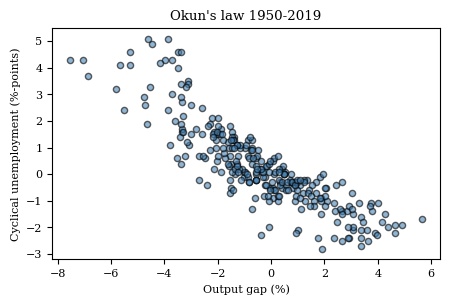

In [27]:
# Use pandas scatter() method to create scatter plot
ax = df.plot.scatter(
    x='gdp_gap',                        # Column for x-axis 
    y='u_gap',                          # Column for y-axis
    c='steelblue',
    edgecolors='black',                 # Color of marker edges
    s=20,                               # Marker size
    alpha=0.6,                          # Transparency
    figsize=(5, 3),
    xlabel='Output gap (%)',
    ylabel='Cyclical unemployment (%-points)',
    title='Okun\'s law 1950-2019',
)

As the graph shows, Okun's law seems to hold during this period as high levels of cyclical unemployment are associated with large negative values of the output gap (i.e., the economy is in a recession).

### Part (3): Assign decade to each observation

The decade can be created from the calendar year by using floor division (`//`).
The `//` operator performs division and rounds the result down to the nearest integer, so that `1951 // 10 = 195`, etc.

In [28]:
# Create column to store the decade
df['Decade'] = df.index.year // 10 * 10

# Confirm that each decade has 40 quarterly observations
df['Decade'].value_counts()

Decade
1950    40
1960    40
1970    40
1980    40
1990    40
2000    40
2010    40
Name: count, dtype: int64

### Part (4): Scatter plots by decade

We can now use the decade partitioning to create subplots by decade.
The figure contains 3-by-3 subplots, but we have only 7 decades of data,
so the last two subplots remain empty.

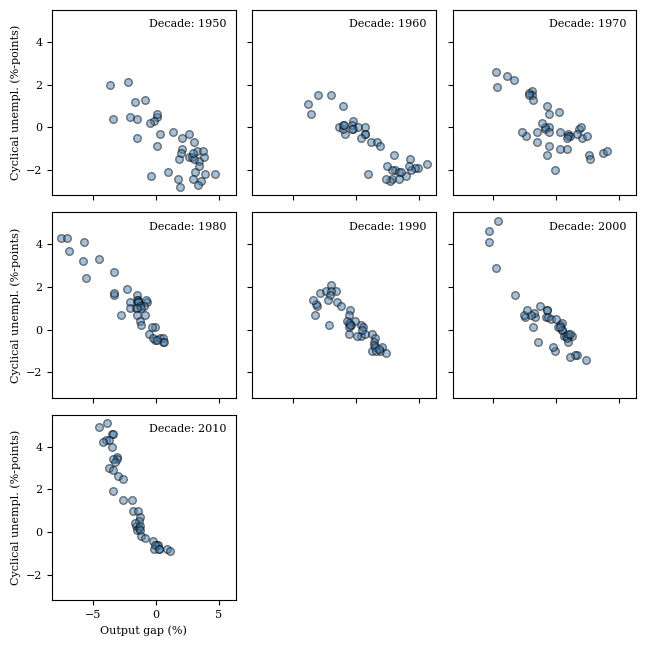

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

decades = df['Decade'].unique()

ncol = 3
nrow = int(np.ceil(len(decades)/ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(6.5, 6.5), sharex=True, sharey=True)

for i in range(nrow):
    for j in range(ncol):
        # Select current axes
        ax = axes[i, j]

        # Map axes index to decade index
        k = i * ncol + j

        # Skip axes if there are no more decades to plot
        if k >= len(decades):
            ax.set_visible(False)
            continue

        # Decade to plot in current axes
        decade = decades[k]
        
        # Recover current decade
        df_decade = df.query(f'Decade == {decade}')

        # Scatter cyclical unemployment against output gap
        ax.scatter(df_decade['gdp_gap'], df_decade['u_gap'], alpha=0.5, s=30, 
            c='steelblue', edgecolors='black')
        
        # Add decade label
        ax.text(0.95, 0.95, f'Decade: {decade}', transform=ax.transAxes, va='top', ha='right')

        # Add tick labels to the last row and first column
        if i == nrow - 1:
            ax.set_xlabel('Output gap (%)')
        if j == 0:
            ax.set_ylabel('Cyclical unempl. (%-points)')


fig.tight_layout()

### Part (5): Run regressions by decade

We first write a function that accepts a subset of the `DataFrame` corresponding to each decade and runs the regression from [(3.1)](#Okun)

In [30]:
def regress_okun(x):
    """
    Run regression for Okun's law.

    Parameters
    ----------
    x : DataFrame
        DataFrame with columns 'u_gap' and 'gdp_gap'.

    Returns
    -------
    Series
        Estimated coefficients.
    """

    # Extract dependent and regressor variables
    outcome = x['u_gap'].to_numpy()
    GDP_gap = x['gdp_gap'].to_numpy()

    # Regressor matrix including intercept
    regr = np.ones((len(GDP_gap), 2))
    # overwrite second column with output gap
    regr[:,1] = GDP_gap

    # Solve least-squares problem (pass rcond=None to avoid a warning)
    coefs, *rest = np.linalg.lstsq(regr, outcome, rcond=None)

    # Construct Series which will be returned to apply()
    columns = ['alpha', 'beta']
    df_out = pd.Series(coefs, index=columns)

    return df_out

In [31]:
# Group by decade and apply regression to each group
coefs = df.groupby('Decade')[['gdp_gap', 'u_gap']].apply(regress_okun)

# Print estimated coefficients
coefs

,alpha,beta
Decade,,
1950,-0.238803,-0.455904
1960,-0.303817,-0.432507
1970,-0.055183,-0.395180
1980,0.052545,-0.586890
1990,0.127778,-0.493801
2000,-0.007240,-0.663390
2010,-0.761058,-1.206360


### Part (6): Scatter plots with regression line

We now recreate the scatter plots from above but add the regression line to each subplot.

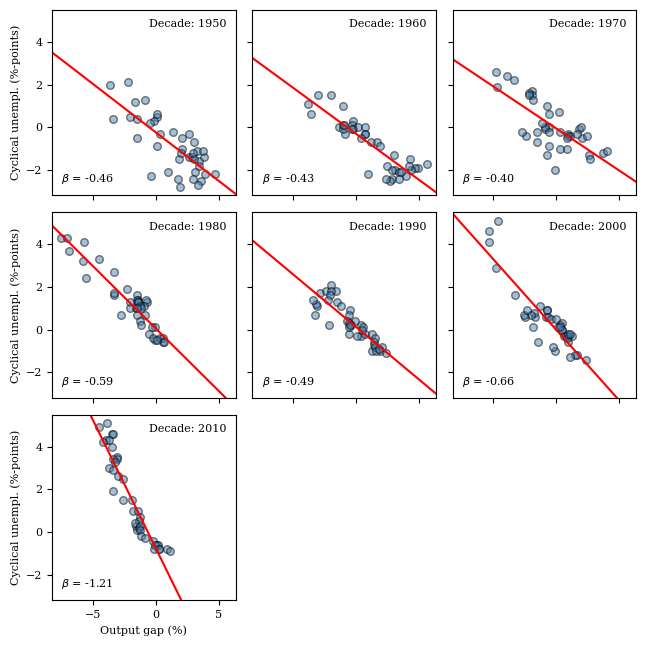

In [ ]:
fig, axes = plt.subplots(nrow, ncol, figsize=(6.5, 6.5), sharex=True, sharey=True)

for i in range(nrow):
    for j in range(ncol):
        ax = axes[i, j]

        # Decade index
        k = i * ncol + j

        # Skip axes if there are no more decades to plot
        if k >= len(decades):
            ax.set_visible(False)
            continue

        # Decade to plot in current axes
        decade = decades[k]

        # Recover current decade
        df_decade = df.query(f'Decade == {decade}')

        # Scatter cyclical unemployment against output gap
        ax.scatter(
            df_decade['gdp_gap'],
            df_decade['u_gap'],
            alpha=0.5,
            s=30,
            c='steelblue',
            edgecolors='black',
        )

        # Add regression line
        intercept, slope = coefs.loc[decade]
        ax.axline((0, intercept), slope=slope, color='red', linestyle='-', lw=1.5)

        # Add text with estimated slope of the regression line
        ax.text(
            0.05,
            0.05,
            f'$\\beta$ = {slope:.2f}',
            transform=ax.transAxes,
            va='bottom',
            ha='left',
        )

        # Add decade label
        ax.text(
            0.95,
            0.95,
            f'Decade: {decade}',
            transform=ax.transAxes,
            va='top',
            ha='right',
        )

        # Add tick labels to the last row and first column
        if i == nrow - 1:
            ax.set_xlabel('Output gap (%)')
        if j == 0:
            ax.set_ylabel('Cyclical unempl. (%-points)')


fig.tight_layout()